# **PCA DATA IRIS** 



Principal component analysis (PCA) adalah teknik yang digunakan untuk menyederhanakan suatu data, dengan cara mentransformasi data secara linier sehingga terbentuk sistem koordinat baru dengan varians maksimum. PCA dapat digunakan untuk mereduksi dimensi suatu data tanpa mengurangi karakteristik data tersebut secara signifikan. 

# import library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Kode tersebut mengimpor beberapa pustaka yang umum digunakan dalam analisis dan visualisasi data di Python. Pandas (`pd`) digunakan untuk manipulasi data, NumPy (`np`) digunakan untuk operasi numerik, Seaborn (`sns`) digunakan untuk visualisasi data, dan Matplotlib (`plt`) digunakan untuk membuat plot dan grafik.

# import data

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Classification/master/IrisDataset.csv', sep=',')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1. `df=pd.read_csv('https://raw.githubusercontent.com/niswatulsifa/data_iris/master/IrisDataset.csv', sep=',')`: Kode ini menggunakan fungsi `read_csv()` dari pustaka pandas (`pd`) untuk membaca file CSV dari URL yang diberikan. File CSV tersebut merupakan dataset Iris yang diambil dari repositori GitHub. Parameter `sep=','` digunakan untuk menentukan pemisah antar kolom dalam file CSV.

2. `df.head()`: Kode ini digunakan untuk mencetak lima baris pertama dari DataFrame `df`. Fungsi `head()` adalah salah satu metode pandas yang berguna untuk melihat beberapa baris awal dari sebuah DataFrame.

###menghitung jumlah kemunculan setiap nilai unik dalam kolom 'species'

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Kode tersebut menghitung jumlah kemunculan setiap nilai unik dalam kolom 'species' dari DataFrame `df` dan menampilkannya.

In [ ]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

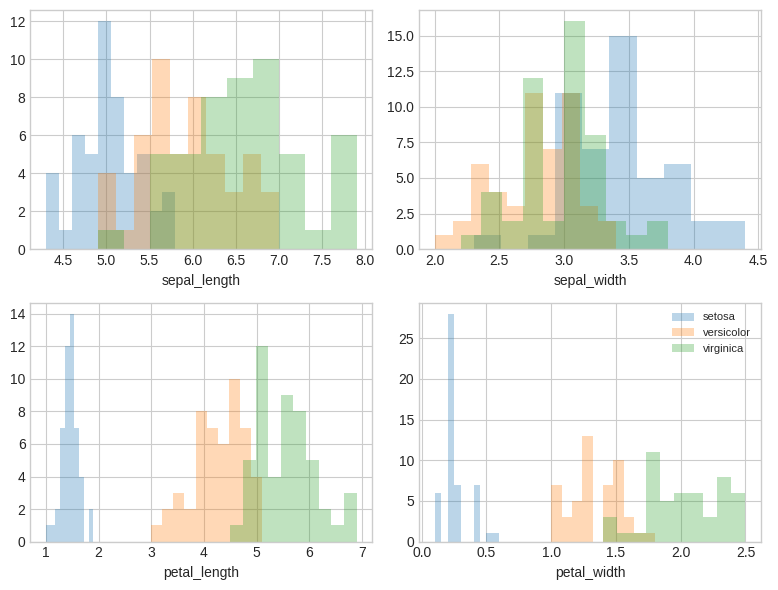

In [ ]:
label_dict={1: 'setosa',
           2: 'versicolor',
           3: 'virginica'}
feature_dict={0: 'sepal_length',1: 'sepal_width',2: 'petal_length',3: 'petal_width'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for i in range(4):
        plt.subplot(2,2,i+1)
        for lab in ('setosa','versicolor','virginica'):
            plt.hist(X[y==lab, i],
                    label=lab,
                    bins=10,
                    alpha=0.3)
        plt.xlabel(feature_dict[i])
    plt.legend(loc='upper right', fancybox=True,fontsize=8)
    
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

In [ ]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
print("Covariance Matrix \n%s" %cov_mat)

Covariance Matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [ ]:
print("Numpy Covariance matrix \n%s" %np.cov(X_std.T))

Numpy Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [ ]:
cov_mat=np.cov(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(cov_mat)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [ ]:
corr_mat1=np.corrcoef(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(corr_mat1)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [ ]:
cor_mat2=np.corrcoef(X.T)
eig_vals, eig_vecs=np.linalg.eig(cor_mat2)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [ ]:
u, s, v=np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [ ]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print("Everithing is ok")

Everithing is ok


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9108180837520528
0.9212209307072249
0.1473532783050959
0.020607707235624884


In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

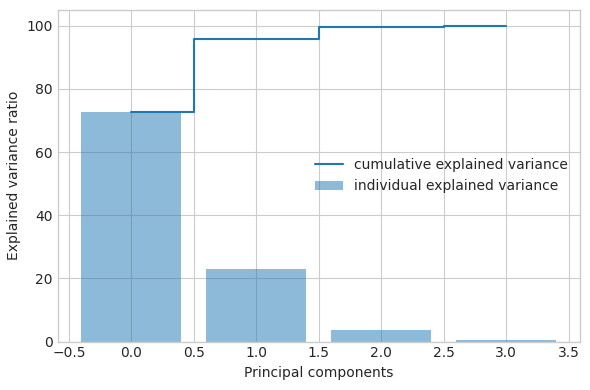

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [ ]:
Y = X_std.dot(matrix_w)

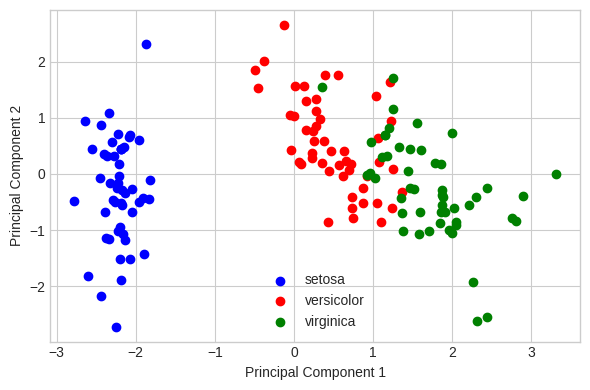

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('setosa', 'versicolor', 'virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

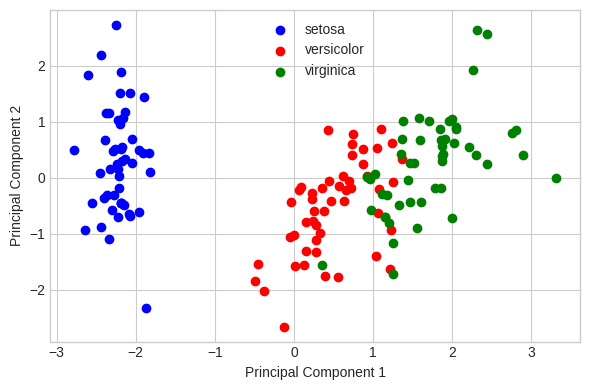

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('setosa', 'versicolor', 'virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()